In [3]:
#tensorflow官方程式碼
#現階段大部分都用pytorch框架，因手寫辨識在早期以純熟，當時tensorflow應用較多，效率較高(快)，所以採用tensorflow，但現今可用pytorch改善損失率
#ref: https://accandrew2.pixnet.net/blog/post/360741170-pytorch-%E8%88%87-tensorflow-%E6%AF%94%E8%BC%83


import tensorflow as tf  #import tensorflow, 無論 CPU 或 GPU 版本都是 import tensorflow as tf

#solve錯誤:Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX AVX2
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [4]:
#keras是tf的一個高階 API，用於建構及訓練深度學習模型

mnist = tf.keras.datasets.mnist  #將MNIST 手寫數字資料讀進來

(x_train, y_train), (x_test, y_test) = mnist.load_data()  # mnist 的load_data()會回傳已經先分割好的training data 和 testing data
x_train, x_test = x_train / 255.0, x_test / 255.0         # 將每個 pixel 從 Int 轉成 floating point 同時做normalize(常見的preprocessing)

In [5]:
print(len(x_train)) #training data 總共有60000張圖片
print(x_train[0].shape) #每張圖片（拿第一張當樣本）大小為 28x28

60000
(28, 28)


In [6]:
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
input_shape = (28, 28, 1)
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape)) #圖片沒超過128*128 kernel size(長寬)為奇數<=3
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))
#model = tf.keras.models.Sequential([ # 開始搭建model 利用 "Sequential" 支援線性傳遞模型，把每層 layer 疊起來
  #tf.keras.layers.Flatten(input_shape=(28, 28)),#把二維的手寫mnist展成一維(28*28=784)
  #tf.keras.layers.Dense(128, activation='relu'), #dense設定神經元數量，加入激活函數使模型有非線性因素
  #tf.keras.layers.Dropout(0.2), #每次訓練按概率20%拿走一部分神經元(每5個隨機輸入丟掉1個變量)，避免過適。剩下的神經元需補上消失的神經元功能，對同個問題有不同解法的集合。對每個神經元的變化不敏感，增加泛化能力
  #tf.keras.layers.Dense(10, activation='softmax')#建立輸出層 數字0~9 有10個
#])


# model每層定義好後，在模型訓練之前要對模型用compile進行設定
model.compile(optimizer='adam', #訓練時用的優化方法，adam最快收斂提高準確度
              loss='sparse_categorical_crossentropy', #用來計算模型在訓練中要減少的量(模型權重的斜率)，loss函式有很多類別，此類別用於multi-classification，2個以上分類且label為int
              metrics=['accuracy'])  #成效衡量指標
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                      

In [7]:
m=model.fit(x_train, y_train, epochs=5, batch_size=50)      # 將搭好的 model 去 fit 我們的 training data
model.evaluate(x_test, y_test, verbose=2)  # 並evalutate 在 testing data 上

Epoch 1/5
1200/1200 [==============================] - 18s 14ms/step - loss: 0.2291 - accuracy: 0.9319
Epoch 2/5
1200/1200 [==============================] - 17s 14ms/step - loss: 0.0873 - accuracy: 0.9736
Epoch 3/5
1200/1200 [==============================] - 19s 16ms/step - loss: 0.0609 - accuracy: 0.9815
Epoch 4/5
1200/1200 [==============================] - 18s 15ms/step - loss: 0.0455 - accuracy: 0.9858
Epoch 5/5
1200/1200 [==============================] - 21s 17ms/step - loss: 0.0362 - accuracy: 0.9883
313/313 - 2s - loss: 0.0621 - accuracy: 0.9831 - 2s/epoch - 6ms/step


[0.06213417276740074, 0.9830999970436096]

0


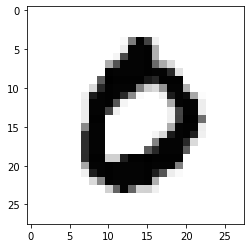

In [33]:
for i in range(0,3):
    plt.imshow(x_test[i+1].reshape(28, 28),cmap='Greys')
    pred = model.predict(x_test[i+1].reshape(1, 28, 28, 1))
print(pred.argmax())
    
#image_index = 666
#plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
#pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
#print(pred.argmax())
#model.get_weights()